<a href="https://colab.research.google.com/github/neel0086/deep_learning/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
import  pathlib
import psutil

In [2]:
dataset_url = "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))

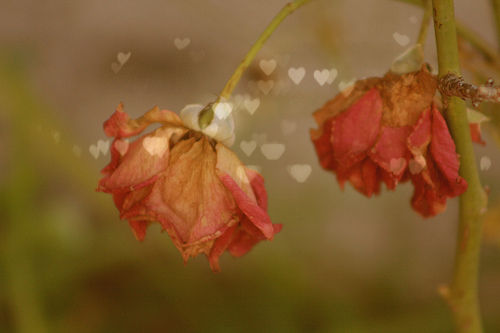

In [6]:
PIL.Image.open(str(list(data_dir.glob('roses/*'))[2]))

In [7]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [9]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [10]:
x, y= [],[]
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [11]:
X = np.array(x)
Y = np.array(y)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)


In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
model = Sequential([
    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 14s 20ms/step - loss: 1.2553 - accuracy: 0.4651
Epoch 2/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9489 - accuracy: 0.6319
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7571 - accuracy: 0.7093
Epoch 4/10
86/86 [==============================] - 2s 20ms/step - loss: 0.5358 - accuracy: 0.8034
Epoch 5/10
86/86 [==============================] - 2s 21ms/step - loss: 0.3296 - accuracy: 0.8870
Epoch 6/10
86/86 [==============================] - 2s 22ms/step - loss: 0.1789 - accuracy: 0.9451
Epoch 7/10
86/86 [==============================] - 2s 21ms/step - loss: 0.1060 - accuracy: 0.9724
Epoch 8/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0940 - accuracy: 0.9720
Epoch 9/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0453 - accuracy: 0.9902
Epoch 10/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0191 - accuracy: 0.9971


In [ ]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 14ms/step - loss: 1.9530 - accuracy: 0.6525


[1.9529722929000854, 0.6525054574012756]

In [14]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape = (180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [15]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, Y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 14s 27ms/step - loss: 1.2513 - accuracy: 0.4836
Epoch 2/50
86/86 [==============================] - 2s 26ms/step - loss: 1.0004 - accuracy: 0.5992
Epoch 3/50
86/86 [==============================] - 2s 28ms/step - loss: 0.9095 - accuracy: 0.6410
Epoch 4/50
86/86 [==============================] - 2s 26ms/step - loss: 0.8415 - accuracy: 0.6715
Epoch 5/50
86/86 [==============================] - 2s 26ms/step - loss: 0.7965 - accuracy: 0.6908
Epoch 6/50
86/86 [==============================] - 2s 26ms/step - loss: 0.7506 - accuracy: 0.7151
Epoch 7/50
86/86 [==============================] - 2s 27ms/step - loss: 0.7088 - accuracy: 0.7322
Epoch 8/50
86/86 [==============================] - 2s 28ms/step - loss: 0.6580 - accuracy: 0.7565
Epoch 9/50
86/86 [==============================] - 2s 28ms/step - loss: 0.6292 - accuracy: 0.7609
Epoch 10/50
86/86 [==============================] - 2s 26ms/step - loss: 0.6140 - accuracy: 0.7642
Epoch 11

In [25]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 18ms/step - loss: 1.2176 - accuracy: 0.7168


[1.2176241874694824, 0.7167755961418152]

In [26]:
import psutil
ram = psutil.virtual_memory()
used_ram_in_bytes = ram.used
used_ram_in_mb = used_ram_in_bytes / (1024 ** 2)  # Convert to MB
used_ram_in_gb = used_ram_in_bytes / (1024 ** 3)  # Convert to GB
print(f"Used RAM: {used_ram_in_mb:.2f} MB")
# or
print(f"Used RAM: {used_ram_in_gb:.2f} GB")

Used RAM: 8464.93 MB
Used RAM: 8.27 GB
